<a href="https://colab.research.google.com/github/PluzNtp/Gans-Data/blob/main/facial%20reenactment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/PluzNtp/Gans-Data
!pip install dlib
!pip install --upgrade imutils
!pip install mediapipe
!pip install torch
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
%cd facial-landmarks
!pip install parts

Cloning into 'Gans-Data'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 58 (delta 17), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (58/58), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.8 MB 168 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
--2022-06-06 11:44:13--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.92.193.74
Connecting to p

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch 
import torch.nn as nn
import torch.optim as optim 
import torchvision 
from  torchvision import transforms
import torchvision.datasets as datasets  
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import cv2 
import os # for file path 
import sys
import dlib
import numpy as np #to open npz files 
from numpy import load
from matplotlib import pyplot as plt #for showing image 
import glob # for reading file in folder 
from imutils import face_utils
from torchvision import datasets, models, transforms
import imutils
import argparse
import mediapipe as mp
from scipy.spatial import distance
from torchvision.io import read_image
from google.colab.patches import cv2_imshow


File path (testing)

In [ ]:
#Run to resize images by half
#(int(img.shape[0]/2))

In [ ]:
# #run to show image in colab 
# plt.imshow(img) 
# rgb_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# cv2_imshow(rgb_img)

In [ ]:
# gray_imgs = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
# plt.imshow(gray_imgs)
# #grayscale

Face detection picture

In [ ]:
# FaceCascade = cv.CascadeClassifier('/content/Gans-Data/haarcascades/haarcascade_frontalface_alt.xml')

In [ ]:
# face = FaceCascade.detectMultiScale( gray_imgs,scaleFactor = 1.1,minNeighbors = 10,)
# print (face)

In [ ]:
# for (x,y,w,h) in face:  
#   cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),20)  #draw ze face
# Detected_img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
# cv2_imshow(Detected_img)


In [ ]:
# imgcrop=[]  # facecroped
# for (x,y,w,h) in face:
#   crop = Detected_img  [y:y+h,x:x+w ]
#   imgcrop.append(crop)
# plt.imshow(imgcrop[0]) 

In [ ]:
# face_edge = cv.Canny(imgcrop[0], threshold1 =  180 , threshold2 = 200 ) #edge detection using canny 
# plt.imshow(face_edge)

video 

In [ ]:
# vid_path = '/content/(300) Millie Bobby Brown Talks Stranger Things & Challenges Jimmy to a Fruit by the Foot Race - YouTube - Google Chrome 2022-05-16 21-32-03_Trim.mp4'
# cap = cv.VideoCapture(vid_path)
# fps = int(cap.get(cv.CAP_PROP_FPS))
# print(f'fps {fps}')

# frame_id = 0
# while (True):
#   ret, frame = cap.read()
#   frame_id += 1
#   print(f'frame {frame_id} status {ret}')
#   gray = cv.cvtColor(frame , cv.COLOR_BGR2GRAY)
#   faces = FaceCascade.detectMultiScale(gray,scaleFactor = 1.1, minNeighbors =  5 )
#   for (x,y,w,h) in faces:
#     print(x,y,w,h)
#     roi_gray = gray[y:y+h, x:x+w]
#     roi_color = frame[y:y+h, x:x+w]
#     img_item  = f'{vid_path[:-4]}_f{frame_id:03d}.jpg'
#     cv.imwrite(img_item, roi_gray)
#     print(f'wrote to {img_item}')
  
#   if cv.waitKey(20)& 0xFF  == ord('q'):
#     break
# cap.release()

**Preparing Data** (run only when propping data) 
cover and shift / 

In [ ]:
# items = os.listdir('/content/drive/MyDrive/face data/')
# img_dir = '/content/drive/MyDrive/face data/'

In [ ]:
items = os.listdir('/content/drive/MyDrive/DATA2')
img_dir = '/content/drive/MyDrive/DATA2'

In [ ]:
glob.glob?

# glob.glob returns a list of paths matching a pathname *pattern*
before = glob.glob(img_dir)

# what you need is a regular expression 
img_file_pattern = os.path.join(img_dir, '*.png')
after = glob.glob(img_file_pattern)

print(f'before {img_dir}: ', before)
print(f'after {img_file_pattern}:', after)


before /content/drive/MyDrive/DATA2:  ['/content/drive/MyDrive/DATA2']
after /content/drive/MyDrive/DATA2/*.png: ['/content/drive/MyDrive/DATA2/69884.png', '/content/drive/MyDrive/DATA2/69885.png', '/content/drive/MyDrive/DATA2/69888.png', '/content/drive/MyDrive/DATA2/69907.png', '/content/drive/MyDrive/DATA2/69901.png', '/content/drive/MyDrive/DATA2/69898.png', '/content/drive/MyDrive/DATA2/69916.png', '/content/drive/MyDrive/DATA2/69889.png', '/content/drive/MyDrive/DATA2/69917.png', '/content/drive/MyDrive/DATA2/69887.png', '/content/drive/MyDrive/DATA2/69903.png', '/content/drive/MyDrive/DATA2/69908.png', '/content/drive/MyDrive/DATA2/69910.png', '/content/drive/MyDrive/DATA2/69891.png', '/content/drive/MyDrive/DATA2/69909.png', '/content/drive/MyDrive/DATA2/69904.png', '/content/drive/MyDrive/DATA2/69906.png', '/content/drive/MyDrive/DATA2/69913.png', '/content/drive/MyDrive/DATA2/69899.png', '/content/drive/MyDrive/DATA2/69890.png', '/content/drive/MyDrive/DATA2/69895.png', '/co

In [ ]:
all_img = []
for img in glob.glob(img_file_pattern):
    n = cv2.imread(img)
    rgb_img = cv2.cvtColor(n,cv2.COLOR_BGR2RGB)
    all_img.append(rgb_img)

print(f'read {len(all_img)} images')

read 116 images


In [ ]:
#250 x #250

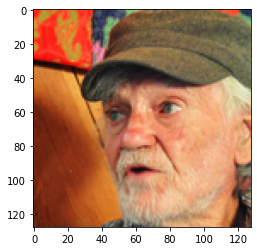

In [ ]:
plt.imshow(all_img[1]) # still in BGR mode, convert ot RGB for accurate presentation

In [ ]:
FaceCascade = cv2.CascadeClassifier('/content/Gans-Data/haarcascades/haarcascade_frontalface_alt.xml')

In [ ]:
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('/content/drive/MyDrive/shape_predictor_68_face_landmarks.dat')

In [ ]:
mp_drawing = mp.solutions.drawing_utils 
drawing_spec = mp_drawing.DrawingSpec(thickness=2, circle_radius=1)
mp_face_mesh = mp.solutions.face_mesh

In [ ]:
i = 0

for img in glob.glob(img_file_pattern):
  print(img)
  read = cv2.imread(img)
  gray =  cv2.cvtColor(read,cv2.COLOR_BGR2GRAY)
  face = FaceCascade.detectMultiScale(gray,scaleFactor = 1.2,minNeighbors = 3,)
  try:
    for (x,y,w,h) in face:
      crop = read[y:y+h,x:x+w ]
    resized = cv2.resize(crop,(600,600))
    black = np.zeros(resized.shape , np.uint8)
    with mp_face_mesh.FaceMesh(
    static_image_mode=True,
    max_num_faces=2,
    min_detection_confidence=0.5) as face_mesh:
         results = face_mesh.process(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    annotated_image = black.copy()
    for face_landmarks in results.multi_face_landmarks:
      mp_drawing.draw_landmarks(
          image=annotated_image,
          landmark_list=face_landmarks,
          connections=mp_face_mesh.FACEMESH_CONTOURS,
          landmark_drawing_spec=drawing_spec,
          connection_drawing_spec=drawing_spec)
      cv2.imwrite("/content/drive/MyDrive/Datajoin/A/test/"+str(i)+".jpg",annotated_image)
      cv2.imwrite("/content/drive/MyDrive/Datajoin/B/test/"+str(i)+".jpg",resized)
      i+=1
  except:
        print("noface")


**Transfer** **Learning**

In [ ]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2447, done.
remote: Total 2447 (delta 0), reused 0 (delta 0), pack-reused 2447
Receiving objects: 100% (2447/2447), 8.18 MiB | 32.09 MiB/s, done.
Resolving deltas: 100% (1535/1535), done.


In [ ]:
!pip install -r /content/pytorch-CycleGAN-and-pix2pix/requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
os.chdir('pytorch-CycleGAN-and-pix2pix/')

FileNotFoundError: ignored

In [ ]:
!bash ./scripts/download_pix2pix_model.sh edges2shoes

Note: available models are edges2shoes, sat2map, map2sat, facades_label2photo, and day2night
Specified [edges2shoes]
for details.

--2022-06-04 18:16:33--  http://efrosgans.eecs.berkeley.edu/pix2pix/models-pytorch/edges2shoes.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 217704688 (208M)
Saving to: ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’

./checkpoints/edges 100%[===================>] 207.62M  56.8MB/s    in 4.0s    

2022-06-04 18:16:37 (52.0 MB/s) - ‘./checkpoints/edges2shoes_pretrained/latest_net_G.pth’ saved [217704688/217704688]



**DataLoader** Only run when needed

In [ ]:
!python datasets/combine_A_and_B.py --fold_A /content/drive/MyDrive/Datajoin/A --fold_B  /content/drive/MyDrive/Datajoin/B --fold_AB /content/drive/MyDrive/Datajoin

[fold_A] =  /content/drive/MyDrive/Datajoin/A
[fold_B] =  /content/drive/MyDrive/Datajoin/B
[fold_AB] =  /content/drive/MyDrive/Datajoin
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
split = test, use 116/116 images
split = test, number of images = 116


In [ ]:
!python datasets/combine_A_and_B.py --fold_A /content/drive/MyDrive/DataFace/A --fold_B /content/drive/MyDrive/DataFace/B --fold_AB /content/drive/MyDrive/DataFace

[fold_A] =  /content/drive/MyDrive/DataFace/A
[fold_B] =  /content/drive/MyDrive/DataFace/B
[fold_AB] =  /content/drive/MyDrive/DataFace
[num_imgs] =  1000000
[use_AB] =  False
[no_multiprocessing] =  False
Traceback (most recent call last):
  File "datasets/combine_A_and_B.py", line 35, in <module>
    img_list = os.listdir(img_fold_A)
NotADirectoryError: [Errno 20] Not a directory: '/content/drive/MyDrive/DataFace/A/0.jpg'


Train



---



TRAIN .PY 

In [ ]:
# class CustomImageDataset(Dataset):
#     def __init__(self, img_dir, transform=None, target_transform=None):
#         self.img_dir = img_dir
#         self.transform = transform
#         self.target_transform = target_transform
#     def __len__(self):
#         return len(self.img_dir)

#     def __getitem__(self, idx):
#         img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
#         image = read_image(img_path)
#         label = self.img_labels.iloc[idx, 1]
#         if self.transform:
#             image = self.transform(image)
#         if self.target_transform:
#             label = self.target_transform(label)
#         return image, label

My pathetic attempt at pix2pix implementation 
form youtube tutorial

**CONFIGURATIONS**

In [ ]:
!cp /content/drive/MyDrive/Module/config.py /content
!cp /content/drive/MyDrive/Module/dataset.py /content
!cp /content/drive/MyDrive/Module/discriminator_model.py /content
!cp /content/drive/MyDrive/Module/generator_model.py /content
!cp /content/drive/MyDrive/Module/utils.py /content

In [ ]:
import cv2

In [ ]:
!pip install -q -U albumentations
!echo "$(pip freeze | grep albumentations) is successfully installed"

     |████████████████████████████████| 102 kB 6.7 MB/s 
     |████████████████████████████████| 47.8 MB 1.3 MB/s 
albumentations==1.1.0 is successfully installed


In [ ]:
import albumentations 
from albumentations.pytorch import ToTensorV2

In [ ]:
import config

In [ ]:
import torch
import albumentations as A
from albumentations.pytorch import ToTensorV2

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
TRAIN_DIR = "/content/drive/MyDrive/Dataset/train"
VAL_DIR = "/content/drive/MyDrive/Dataset/Val"
LEARNING_RATE = 2e-4
BATCH_SIZE = 5
NUM_WORKERS = 2
IMAGE_SIZE = 256
CHANNELS_IMG = 3
L1_LAMBDA = 100
LAMBDA_GP = 10
NUM_EPOCHS = 500
LOAD_MODEL = False
SAVE_MODEL = False
CHECKPOINT_DISC = "disc.pth.tar"
CHECKPOINT_GEN = "gen.pth.tar"

both_transform = A.Compose(
    [A.Resize(width=256, height=256),], additional_targets={"image0": "image"},
)

transform_only_input = A.Compose(
    [
        A.HorizontalFlip(p=0.5),
        A.ColorJitter(p=0.2),
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
)

transform_only_mask = A.Compose(
    [
        A.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5], max_pixel_value=255.0,),
        ToTensorV2(),
    ]
)

**UTiLS**

In [ ]:
import torch
import config
from torchvision.utils import save_image

def save_some_examples(gen, val_loader, epoch, folder):
    x, y = next(iter(val_loader))
    x, y = x.to(config.DEVICE), y.to(config.DEVICE)
    gen.eval()
    with torch.no_grad():
        y_fake = gen(x)
        y_fake = y_fake * 0.5 + 0.5  # remove normalization#
        save_image(y_fake, folder + f"/y_gen_{epoch}.png")
        save_image(x * 0.5 + 0.5, folder + f"/input_{epoch}.png")
        if epoch == 1:
            save_image(y * 0.5 + 0.5, folder + f"/label_{epoch}.png")
    gen.train()


def save_checkpoint(model, optimizer, filename="my_checkpoint.pth.tar"):
    print("=> Saving checkpoint")
    checkpoint = {
        "state_dict": model.state_dict(),
        "optimizer": optimizer.state_dict(),
    }
    torch.save(checkpoint, filename)


def load_checkpoint(checkpoint_file, model, optimizer, lr):
    print("=> Loading checkpoint")
    checkpoint = torch.load(checkpoint_file, map_location=config.DEVICE)
    model.load_state_dict(checkpoint["state_dict"])
    optimizer.load_state_dict(checkpoint["optimizer"])

    # If we don't do this then it will just have learning rate of old checkpoint
    # and it will lead to many hours of debugging \:
    for param_group in optimizer.param_groups:
        param_group["lr"] = lr

**DATASET** **CLASS**

In [ ]:
import numpy as np
import config
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from torchvision.utils import save_image


class MapDataset(Dataset):
    def __init__(self, root_dir):
        self.root_dir = root_dir
        self.list_files = os.listdir(self.root_dir)

    def __len__(self):
        return len(self.list_files)

    def __getitem__(self, index):
        img_file = self.list_files[index]
        img_path = os.path.join(self.root_dir, img_file)
        image = np.array(Image.open(img_path))
        input_image = image[:, :600, :]
        target_image = image[:, 600:, :]

        augmentations = config.both_transform(image=input_image, image0=target_image)
        input_image = augmentations["image"]
        target_image = augmentations["image0"]

        input_image = config.transform_only_input(image=input_image)["image"]
        target_image = config.transform_only_mask(image=target_image)["image"]

        return input_image, target_image


if __name__ == "__main__":
    dataset = MapDataset("/content/drive/MyDrive/Dataset/train")
    loader = DataLoader(dataset, batch_size=5)
    for x, y in loader:
        print(x.shape)
        save_image(x, "x.png")
        save_image(y, "y.png")
     
    

**GENERATOR**

In [ ]:
import torch
import torch.nn as nn


class Block(nn.Module):
    def __init__(self, in_channels, out_channels, down=True, act="relu", use_dropout=False):
        super(Block, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 4, 2, 1, bias=False, padding_mode="reflect")
            if down
            else nn.ConvTranspose2d(in_channels, out_channels, 4, 2, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU() if act == "relu" else nn.LeakyReLU(0.2),
        )

        self.use_dropout = use_dropout
        self.dropout = nn.Dropout(0.5)
        self.down = down

    def forward(self, x):
        x = self.conv(x)
        return self.dropout(x) if self.use_dropout else x


class Generator(nn.Module):
    def __init__(self, in_channels=3, features=64):
        super().__init__()
        self.initial_down = nn.Sequential(
            nn.Conv2d(in_channels, features, 4, 2, 1, padding_mode="reflect"),
            nn.LeakyReLU(0.2),
        )
        self.down1 = Block(features, features * 2, down=True, act="leaky", use_dropout=False)
        self.down2 = Block(
            features * 2, features * 4, down=True, act="leaky", use_dropout=False
        )
        self.down3 = Block(
            features * 4, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down4 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down5 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.down6 = Block(
            features * 8, features * 8, down=True, act="leaky", use_dropout=False
        )
        self.bottleneck = nn.Sequential(
            nn.Conv2d(features * 8, features * 8, 4, 2, 1), nn.ReLU()
        )

        self.up1 = Block(features * 8, features * 8, down=False, act="relu", use_dropout=True)
        self.up2 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up3 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=True
        )
        self.up4 = Block(
            features * 8 * 2, features * 8, down=False, act="relu", use_dropout=False
        )
        self.up5 = Block(
            features * 8 * 2, features * 4, down=False, act="relu", use_dropout=False
        )
        self.up6 = Block(
            features * 4 * 2, features * 2, down=False, act="relu", use_dropout=False
        )
        self.up7 = Block(features * 2 * 2, features, down=False, act="relu", use_dropout=False)
        self.final_up = nn.Sequential(
            nn.ConvTranspose2d(features * 2, in_channels, kernel_size=4, stride=2, padding=1),
            nn.Tanh(),
        )

    def forward(self, x):
        d1 = self.initial_down(x)
        d2 = self.down1(d1)
        d3 = self.down2(d2)
        d4 = self.down3(d3)
        d5 = self.down4(d4)
        d6 = self.down5(d5)
        d7 = self.down6(d6)
        bottleneck = self.bottleneck(d7)
        up1 = self.up1(bottleneck)
        up2 = self.up2(torch.cat([up1, d7], 1))
        up3 = self.up3(torch.cat([up2, d6], 1))
        up4 = self.up4(torch.cat([up3, d5], 1))
        up5 = self.up5(torch.cat([up4, d4], 1))
        up6 = self.up6(torch.cat([up5, d3], 1))
        up7 = self.up7(torch.cat([up6, d2], 1))
        return self.final_up(torch.cat([up7, d1], 1))


def test():
    x = torch.randn((1, 3, 256, 256))
    model = Generator(in_channels=3, features=64)
    preds = model(x)
    print(preds.shape)


if __name__ == "__main__":
    test()

**DISCRIMINATOR**

In [ ]:
import torch
import torch.nn as nn


class CNNBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride):
        super(CNNBlock, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(
                in_channels, out_channels, 4, stride, 1, bias=False, padding_mode="reflect"
            ),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2),
        )

    def forward(self, x):
        return self.conv(x)


class Discriminator(nn.Module):
    def __init__(self, in_channels=3, features=[64, 128, 256, 512]):
        super().__init__()
        self.initial = nn.Sequential(
            nn.Conv2d(
                in_channels * 2,
                features[0],
                kernel_size=4,
                stride=2,
                padding=1,
                padding_mode="reflect",
            ),
            nn.LeakyReLU(0.2),
        )

        layers = []
        in_channels = features[0]
        for feature in features[1:]:
            layers.append(
                CNNBlock(in_channels, feature, stride=1 if feature == features[-1] else 2),
            )
            in_channels = feature

        layers.append(
            nn.Conv2d(
                in_channels, 1, kernel_size=4, stride=1, padding=1, padding_mode="reflect"
            ),
        )

        self.model = nn.Sequential(*layers)

    def forward(self, x, y):
        x = torch.cat([x, y], dim=1)
        x = self.initial(x)
        x = self.model(x)
        return x


def test():
    x = torch.randn((1, 3, 256, 256))
    y = torch.randn((1, 3, 256, 256))
    model = Discriminator(in_channels=3)
    preds = model(x, y)
    print(model)
    print(preds.shape)


if __name__ == "__main__":
    test()

**bold text**# Train.py

In [ ]:
import torch
from utils import save_checkpoint, load_checkpoint, save_some_examples
import torch.nn as nn
import torch.optim as optim
import config
from dataset import MapDataset
from generator_model import Generator
from discriminator_model import Discriminator
from torch.utils.data import DataLoader
from tqdm import tqdm
from torchvision.utils import save_image

torch.backends.cudnn.benchmark = True


def train_fn(
    disc, gen, loader, opt_disc, opt_gen, l1_loss, bce, g_scaler, d_scaler,
):
    loop = tqdm(loader, leave=True)

    for idx, (x, y) in enumerate(loop):
        x = x.to(config.DEVICE)
        y = y.to(config.DEVICE)

        # Train Discriminator
        with torch.cuda.amp.autocast():
            y_fake = gen(x)
            D_real = disc(x, y)
            D_real_loss = bce(D_real, torch.ones_like(D_real))
            D_fake = disc(x, y_fake.detach())
            D_fake_loss = bce(D_fake, torch.zeros_like(D_fake))
            D_loss = (D_real_loss + D_fake_loss) / 2

        disc.zero_grad()
        d_scaler.scale(D_loss).backward()
        d_scaler.step(opt_disc)
        d_scaler.update()

        # Train generator
        with torch.cuda.amp.autocast():
            D_fake = disc(x, y_fake)
            G_fake_loss = bce(D_fake, torch.ones_like(D_fake))
            L1 = l1_loss(y_fake, y) * config.L1_LAMBDA
            G_loss = G_fake_loss + L1

        opt_gen.zero_grad()
        g_scaler.scale(G_loss).backward()
        g_scaler.step(opt_gen)
        g_scaler.update()

        if idx % 10 == 0:
            loop.set_postfix(
                D_real=torch.sigmoid(D_real).mean().item(),
                D_fake=torch.sigmoid(D_fake).mean().item(),
            )


def main():
    disc = Discriminator(in_channels=3).to(config.DEVICE)
    gen = Generator(in_channels=3, features=64).to(config.DEVICE)
    opt_disc = optim.Adam(disc.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.999),)
    opt_gen = optim.Adam(gen.parameters(), lr=config.LEARNING_RATE, betas=(0.5, 0.999))
    BCE = nn.BCEWithLogitsLoss()
    L1_LOSS = nn.L1Loss()

    if config.LOAD_MODEL:
        load_checkpoint(
            config.CHECKPOINT_GEN, gen, opt_gen, config.LEARNING_RATE,
        )
        load_checkpoint(
            config.CHECKPOINT_DISC, disc, opt_disc, config.LEARNING_RATE,
        )

    train_dataset = MapDataset(root_dir=config.TRAIN_DIR)
    train_loader = DataLoader(
        train_dataset,
        batch_size=config.BATCH_SIZE,
        shuffle=True,
        num_workers=config.NUM_WORKERS,
    )
    g_scaler = torch.cuda.amp.GradScaler()
    d_scaler = torch.cuda.amp.GradScaler()
    val_dataset = MapDataset(root_dir=config.VAL_DIR)
    val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

    for epoch in range(config.NUM_EPOCHS):
        train_fn(
            disc, gen, train_loader, opt_disc, opt_gen, L1_LOSS, BCE, g_scaler, d_scaler,
        )

        if config.SAVE_MODEL and epoch % 5 == 0:
            save_checkpoint(gen, opt_gen, filename=config.CHECKPOINT_GEN)
            save_checkpoint(disc, opt_disc, filename=config.CHECKPOINT_DISC)

        save_some_examples(gen, val_loader, epoch, folder="/content/evaluation")


if __name__ == "__main__":
    main()


100%|██████████| 1040/1040 [01:12<00:00, 14.43it/s, D_fake=0.0767, D_real=0.921]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1040/1040 [01:10<00:00, 14.85it/s, D_fake=0.0334, D_real=0.755]


=> Saving checkpoint
=> Saving checkpoint


100%|██████████| 1040/1040 [01:10<00:00, 14.67it/s, D_fake=0.0211, D_real=0.998]


In [ ]:
torch.save(model.state_dict(), PATH)

NameError: ignored